In [54]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

In [3]:
data = keras.preprocessing.image_dataset_from_directory(
    'Eye dataset',
    image_size = (80, 80),
    batch_size = 32,
    shuffle = True
)

Found 14360 files belonging to 4 classes.


In [6]:
class_names = data.class_names
class_names

['close_look', 'forward_look', 'left_look', 'right_look']

In [8]:
print('Number of batches in the dataset:', len(data))

Number of batches in the dataset: 449


In [10]:
for images, labels in data.take(1):
    print('Number of images in each batches:', len(images))

Number of images in each batches: 32


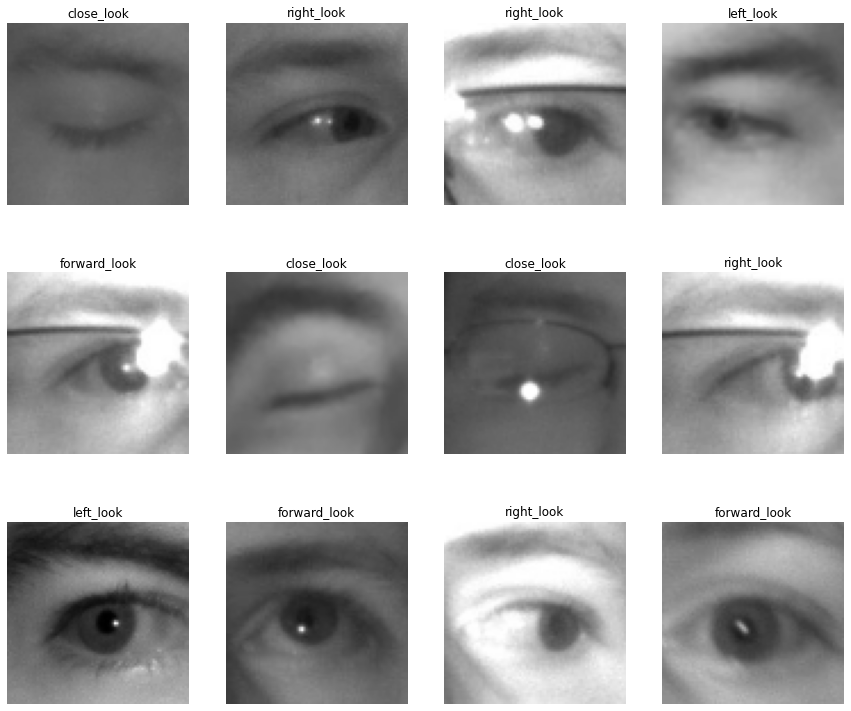

In [16]:
plt.figure(figsize = (15, 13))
for images, labels in data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype('uint32'))
        plt.title(class_names[labels[i].numpy()])
        plt.axis('off')

In [31]:
data_scaled = data.map(lambda x, y: (x / 255, y))

In [37]:
def data_splitting(data):
    train_size = int(len(data) * 0.8)
    test_size = int(len(data) * 0.1)
    validation_size = int(len(data) * 0.1)
    train_data = data.take(train_size)
    test_data = data.skip(train_size).take(test_size)
    validation_data = data.skip(train_size + test_size).take(validation_size)
    return train_data, test_data, validation_data

In [38]:
train_data, test_data, validation_data = data_splitting(data_scaled)

In [39]:
print('Number of batches in training data:', len(train_data))
print('Number of batches in test data:', len(test_data))
print('Number of batches in validation data:', len(validation_data))
for images, lables in train_data.take(1):
    print('Number of images in each batches:', len(images))

Number of batches in training data: 359
Number of batches in test data: 44
Number of batches in validation data: 44
Number of images in each batches: 32


In [41]:
train_data = train_data.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
validation_data = validation_data.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [45]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [46]:
model = Sequential()

In [47]:
model.add(Input(shape = (80, 80, 3)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(len(class_names), activation = 'softmax'))

In [48]:
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [49]:
history = model.fit(train_data, epochs = 100, validation_data = validation_data, callbacks = [early_stopping])

Epoch 1/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 80s 109ms/step - accuracy: 0.6293 - loss: 0.8672 - val_accuracy: 0.8942 - val_loss: 0.3296
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9314 - loss: 0.2205 - val_accuracy: 0.9425 - val_loss: 0.1800
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9533 - loss: 0.1428 - val_accuracy: 0.9510 - val_loss: 0.1664
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9644 - loss: 0.1186 - val_accuracy: 0.9602 - val_loss: 0.1135
Epoch 5/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.9691 - loss: 0.0979 - val_accuracy: 0.9666 - val_loss: 0.1111
Epoch 6/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9691 - loss: 0.0961 - val_accuracy: 0.9666 - val_loss: 0.1241
Epoch 7/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 66ms/step - accuracy: 0.9733 - loss: 0.0809 - val_accuracy: 0.9723 - val_loss: 0.0987
Epoch 8/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.9771 - loss: 

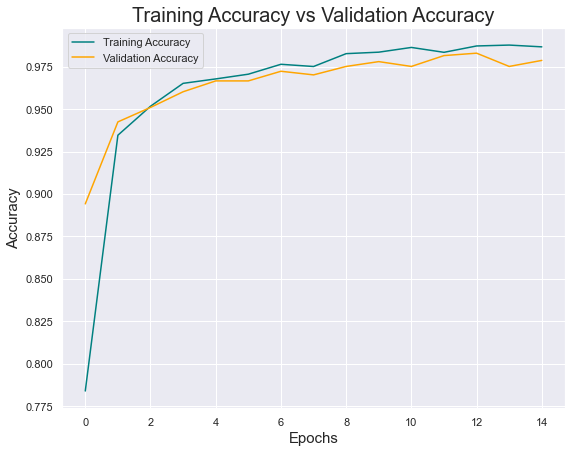

In [52]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy', fontsize = 20)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()

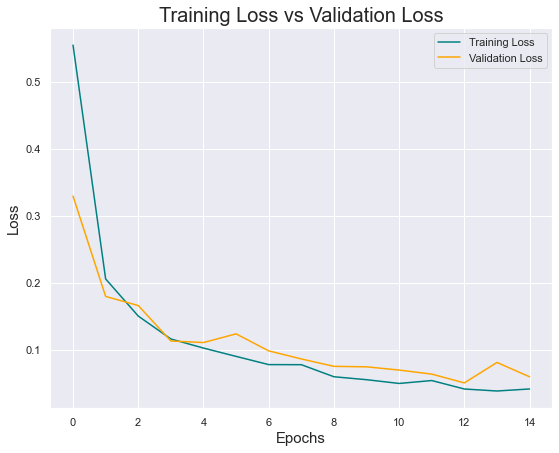

In [53]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss', fontsize = 20)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend()
plt.show()

In [55]:
model.evaluate(test_data)

44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9752 - loss: 0.0881


[0.07425546646118164, 0.9786931872367859]

In [65]:
test_images, test_labels = [], []
for images, labels in test_data:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())

In [69]:
image_t = []
for batches in test_images:
    for image in batches:
        image_t.append(image)

In [75]:
label_t = []
for batches in test_labels:
    for label in batches:
        label_t.append(label)

In [77]:
label_t[:10]

[2, 0, 1, 0, 2, 3, 3, 2, 1, 1]

In [79]:
len(image_t)

1408

In [80]:
len(label_t)

1408

In [84]:
image_t_np = np.array(image_t)

In [85]:
image_t_np.shape

(1408, 80, 80, 3)

In [87]:
y_p = model.predict(image_t_np)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [88]:
y_p[:10]

array([[1.88343351e-11, 4.87395653e-07, 9.99999523e-01, 3.06897867e-08],
       [9.99999166e-01, 7.06805423e-14, 1.99844393e-07, 6.30188310e-07],
       [1.83912675e-06, 9.98321950e-01, 1.63661456e-03, 3.96203577e-05],
       [1.00000000e+00, 1.45705876e-21, 2.13128301e-25, 1.54351503e-24],
       [7.14902981e-09, 5.75499085e-04, 8.10620010e-01, 1.88804463e-01],
       [1.43003054e-10, 1.37085010e-06, 1.09120091e-08, 9.99998689e-01],
       [2.28321077e-11, 9.18685475e-11, 5.40645514e-11, 1.00000000e+00],
       [8.93277318e-32, 5.28998190e-20, 1.00000000e+00, 1.00227715e-13],
       [4.20923607e-04, 7.85599232e-01, 9.36278739e-05, 2.13886321e-01],
       [7.47005373e-08, 9.99591887e-01, 1.61410513e-04, 2.46624200e-04]],
      dtype=float32)

In [89]:
y_pred = [np.argmax(i) for i in y_p]
y_pred[:10]

[2, 0, 1, 0, 2, 3, 3, 2, 1, 1]

In [90]:
print(classification_report(label_t, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       363
           1       0.95      0.98      0.96       321
           2       0.99      0.97      0.98       341
           3       0.98      0.96      0.97       383

    accuracy                           0.98      1408
   macro avg       0.98      0.98      0.98      1408
weighted avg       0.98      0.98      0.98      1408



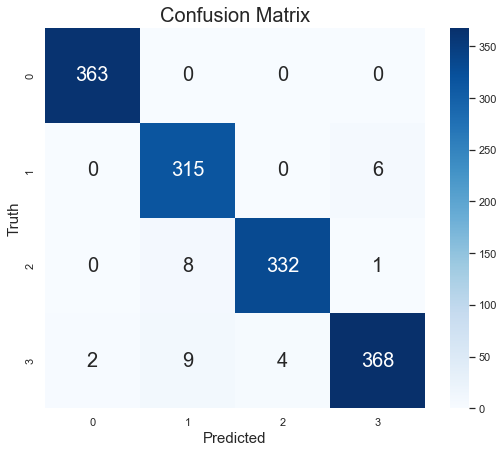

In [91]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(label_t, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 20}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Truth', fontsize = 15)
plt.show()